In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [14]:
mnist.train.num_examples

55000

In [4]:
batch_xs, batch_ys = mnist.train.next_batch(100)

In [5]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

In [6]:
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [7]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [8]:
# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))

In [9]:
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [10]:
# parameters
training_epochs = 50
batch_size = 100

Epoch: 0001 cost = 2.814185140
Epoch: 0002 cost = 1.126109797
Epoch: 0003 cost = 0.902358871
Epoch: 0004 cost = 0.790919655
Epoch: 0005 cost = 0.719065804
Epoch: 0006 cost = 0.667459424
Epoch: 0007 cost = 0.628712693
Epoch: 0008 cost = 0.597560704
Epoch: 0009 cost = 0.571673864
Epoch: 0010 cost = 0.550605475
Epoch: 0011 cost = 0.531477483
Epoch: 0012 cost = 0.515057144
Epoch: 0013 cost = 0.501433706
Epoch: 0014 cost = 0.488209824
Epoch: 0015 cost = 0.476464939
Epoch: 0016 cost = 0.467205328
Epoch: 0017 cost = 0.456645362
Epoch: 0018 cost = 0.449323356
Epoch: 0019 cost = 0.441074659
Epoch: 0020 cost = 0.432838544
Epoch: 0021 cost = 0.427113936
Epoch: 0022 cost = 0.419891330
Epoch: 0023 cost = 0.414554002
Epoch: 0024 cost = 0.409232133
Epoch: 0025 cost = 0.403655015
Epoch: 0026 cost = 0.398970651
Epoch: 0027 cost = 0.393749655
Epoch: 0028 cost = 0.389912745
Epoch: 0029 cost = 0.385084030
Epoch: 0030 cost = 0.381624041
Epoch: 0031 cost = 0.378182689
Epoch: 0032 cost = 0.374296400
Epoch: 0

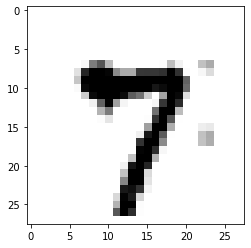

In [13]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer],feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch:', '%04d' % (epoch + 1),'cost =', '{:.9f}'.format(avg_cost))
    print("Accuracy: ", accuracy.eval(session=sess,feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)

    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis, 1),
                                  feed_dict={X: mnist.test.images[r:r + 1]}))
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

In [16]:
batch_ys[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])